# Reading & Cleaning

In [1]:
# Install Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# Read in the Datasets

master = pd.read_csv('College Promise - Alamo Colleges - 03.10.2025.csv') #79 MB
raw = pd.read_csv('College Promise - Alamo Colleges - 03.10.2025.csv') #79 MB
new = pd.read_csv('Alamo Colleges Promise Sample File 23SEP2025.xlsx - Alamo Colleges Promise Sample F.csv') #15 MB

/var/folders/w5/bhg58mt11hdggrtpr24_0nd80000gn/T/ipykernel_38721/3262379571.py:3: DtypeWarning: Columns (8,19,58,63,67,68,69,85,86,87,142,143,144,195,211,212,213,244,250,251,256,257,258,262,263,264,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289) have mixed types. Specify dtype option on import or set low_memory=False.
  master = pd.read_csv('College Promise - Alamo Colleges - 03.10.2025.csv') #79 MB
/var/folders/w5/bhg58mt11hdggrtpr24_0nd80000gn/T/ipykernel_38721/3262379571.py:4: DtypeWarning: Columns (8,19,58,63,67,68,69,85,86,87,142,143,144,195,211,212,213,244,250,251,256,257,258,262,263,264,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv('College Promise - Alamo Colleges - 03.10.2025.csv') #79 MB
/var/folders/w5/bhg58mt11hdggrtpr24_0nd80000gn/T/ipykernel_38721/3262379571.py:5: DtypeWarning: Columns (19,26,38) have mixed types. Specify dtype option o

In [3]:
# Show duplicates in the raw dataset

print(f"Number of duplicate Student_IDs in raw: {raw.duplicated(subset=['Student_ID']).sum()}")
print("\nRows with duplicate Student_IDs in raw:")
raw[raw.duplicated(subset=['Student_ID'], keep=False)].sort_values('Student_ID')

Number of duplicate Student_IDs in raw: 304

Rows with duplicate Student_IDs in raw:


,College,Student_ID,ACADEMIC_PERIOD,FTIC_Cohort,FTIC_Status,AP_COHORT,AP_COHORT_TERM,Original_ZIP_Code,ZIP_Code_Five_Digits,Gender,...,PRE_25,PRE_26,PRE_27,PRE_28,PRE_29,PRE_30,PRE_31,PRE_32,PRE_33,PRE_34
7559,ACD UnDup,728014,202310,Fall 2022 FTIC Cohort,non-Promise FTIC,,,78211-2127,78211,Female,...,,,,,,,,.607867086036727,,
7560,ACD UnDup,728014,202510,Fall 2024 FTIC Cohort,non-Promise FTIC,,,78211-2127,78211,Female,...,,,,,,,,,,
7588,ACD UnDup,743134,202210,Fall 2021 FTIC Cohort,non-Promise FTIC,,,78247-5419,78247,Male,...,,,,,,,.7310459747606,.400635663050478,,
1950,ACD UnDup,743134,202110,Fall 2020 FTIC Cohort,non-Promise FTIC,,,78247-5419,78247,Male,...,0.529107,0.526595,0.151727,0.445394,0.776149,0.643228,0.731046,.400635663050478,,
7711,ACD UnDup,804227,202210,Fall 2021 FTIC Cohort,non-Promise FTIC,,,78223-1506,78223,Female,...,,,,,,,.697869662333693,.290733866435937,.999023048652212,.623908148687857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42590,ACD UnDup,1574985,202510,Fall 2024 FTIC Cohort,non-Promise FTIC,,,78233-5739,78233,Female,...,,,,,,,,,,
42768,ACD UnDup,1577206,202410,Fall 2023 FTIC Cohort,Promise FTIC,APROMISE23,202410,78232-5144,78232,Male,...,,,,,,,,,.999476630955784,.335774361124627
42769,ACD UnDup,1577206,202410,Fall 2023 FTIC Cohort,Promise FTIC,APROMISE23,202410,78232-5144,78232,Male,...,,,,,,,,,.999476630955784,.335774361124627
43668,ACD UnDup,1582369,202410,Fall 2023 FTIC Cohort,non-Promise FTIC,,,78253-5596,78253,Female,...,,,,,,,,,,


In [4]:
# Show duplicates in the new dataset

print(f"Number of duplicate Student_IDs in new: {new.duplicated(subset=['Student_ID']).sum()}")
print("\nRows with duplicate Student_IDs in new:")
new[new.duplicated(subset=['Student_ID'], keep=False)].sort_values('Student_ID')

Number of duplicate Student_IDs in new: 304

Rows with duplicate Student_IDs in new:


,College,Student_ID,ACADEMIC_PERIOD,FTIC_Cohort,FTIC_Status,AP_COHORT,AP_COHORT_TERM,Gender,Ethnicity,Date_of_Birth,...,TSI_MATH_2_SCORE,TSI_WRTG_SCORE,Fall_2020_100_GR,Fall_2020_150_GR,Fall_2020_200_GR,Fall_2021_100_GR,Fall_2021_150_GR,Fall_2021_200_GR,Fall_2022_100_GR,Fall_2022_150_GR
18347,ACD UnDup,728014,202310,Fall 2022 FTIC Cohort,non-Promise FTIC,NaN,NaN,Female,HISPANIC,07/15/1991,...,918.0,343.0,0,0,0,0,0,0,0,0
18348,ACD UnDup,728014,202510,Fall 2024 FTIC Cohort,non-Promise FTIC,NaN,NaN,Female,HISPANIC,07/15/1991,...,918.0,343.0,0,0,0,0,0,0,0,0
22423,ACD UnDup,743134,202210,Fall 2021 FTIC Cohort,non-Promise FTIC,NaN,NaN,Male,BLACK AFR AMER,02/02/2002,...,NaN,347.0,0,0,0,0,0,1,0,0
22422,ACD UnDup,743134,202110,Fall 2020 FTIC Cohort,non-Promise FTIC,NaN,NaN,Male,BLACK AFR AMER,02/02/2002,...,NaN,347.0,0,0,0,0,0,0,0,0
41271,ACD UnDup,804227,202410,Fall 2023 FTIC Cohort,non-Promise FTIC,NaN,NaN,Female,HISPANIC,09/07/2002,...,910.0,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18460,ACD UnDup,1574985,202510,Fall 2024 FTIC Cohort,non-Promise FTIC,NaN,NaN,Female,HISPANIC,09/04/1999,...,NaN,359.0,0,0,0,0,0,0,0,0
12597,ACD UnDup,1577206,202410,Fall 2023 FTIC Cohort,Promise FTIC,APROMISE23,202410.0,Male,BLACK AFR AMER,04/12/2005,...,952.0,NaN,0,0,0,0,0,0,0,0
49636,ACD UnDup,1577206,202410,Fall 2023 FTIC Cohort,Promise FTIC,APROMISE23,202410.0,Male,BLACK AFR AMER,04/12/2005,...,952.0,NaN,0,0,0,0,0,0,0,0
2909,ACD UnDup,1582369,202410,Fall 2023 FTIC Cohort,non-Promise FTIC,NaN,NaN,Female,BLACK AFR AMER,01/01/1991,...,NaN,NaN,0,0,0,0,0,0,0,0


In [5]:
# Tag duplicates (the second occurence of each unique Student_ID) in both datasets with "_dup"

# The only issue with this is we don't know if the non-"_dup" and "_dup" Student-IDs match in the raw and new datasets.

raw_tagged = raw.copy()
raw_tagged['Student_ID'] = raw_tagged['Student_ID'].astype(str)
raw_tagged['counter'] = raw_tagged.groupby('Student_ID').cumcount() + 1
print(raw_tagged['counter'].unique()) # prints the unique values of Student_ID counts (1 = unique, 2 = one duplicate)

new_tagged = new.copy()
new_tagged['Student_ID'] = new_tagged['Student_ID'].astype(str)
new_tagged['counter'] = new_tagged.groupby('Student_ID').cumcount() + 1
print(new_tagged['counter'].unique()) # prints the unique values of Student_ID counts (1 = unique, 2 = one duplicate)

raw_tagged['Student_ID'] = np.where( # np.where(condition, value_if_true, value_if_false)
    raw_tagged['counter'] == 2,
    raw_tagged['Student_ID'] + '_dup',
    raw_tagged['Student_ID']
)

new_tagged['Student_ID'] = np.where(
    new_tagged['counter'] == 2,
    new_tagged['Student_ID'] + '_dup',
    new_tagged['Student_ID']
)

[1 2]
[1 2]


In [6]:
# Check for Duplicate Student_IDs (there should be 0)

raw_tagged_duplicates = raw_tagged[raw_tagged.duplicated()]
print(raw_tagged_duplicates)

new_tagged_duplicates = new_tagged[new_tagged.duplicated()]
print(new_tagged_duplicates)

Empty DataFrame
Columns: [College, Student_ID, ACADEMIC_PERIOD, FTIC_Cohort, FTIC_Status, AP_COHORT, AP_COHORT_TERM, Original_ZIP_Code, ZIP_Code_Five_Digits, Gender, Ethnicity, Date_of_Birth, Date_of_Birth_Yr_CPC, Age_Years_Old, Generation_CPC, Econ_Disadv, Acad_Disadv, High_School_Data_CPC, County_High_Sch, High_School_Code, HS_NAME_ID_CPC, High_School_Name, Pub_Pri_CPC, High_School_State, GED_CPC, Out_Of_State_CPC, Home_Sch_CPC, OnLine_CPC, Original_HS_GPA, High_School_GPA, Original_HS_GPA_COPY, GPA_4.0_CPC, First_Gen_Status, Parent_Ind, Marital_Status, Veteran_Status, Pell_Status, SAT_YES_CPC, ACT_YES_CPC, TSI_YES_CPC, MEETS_MATH_CPC, SAT_MATH_SCORE, ACT_MATH_SCORE, TSI_MATH_SCORE, TSI_MATH_2_SCORE, MEETS_ELAR_CPC, SAT_READ_WRTG_SCORE, ACT_READ_WRTG_SCORE, TSI_WRTG_SCORE, TSI_Engl_Read_SCORE, MEETS_READING_CPC, TSI_READ_SCORE, SCH, FTPT_Status, Home_Campus, Last_Attended_College, Fall_2020_Best_Predicted_Probabilities_W_0, Fall_2020_Best_Predicted_Probabilities_W_0_1, Fall_2024_Cred

In [7]:
# Join on Student_ID

# need to narrow down to specific variable(s) in the new_tagged dataset

master_1 = pd.merge(raw_tagged, new_tagged, on='Student_ID', how = 'left')
master_1 #same number of rows as both raw and new

,College_x,Student_ID,ACADEMIC_PERIOD_x,FTIC_Cohort_x,FTIC_Status_x,AP_COHORT_x,AP_COHORT_TERM_x,Original_ZIP_Code,ZIP_Code_Five_Digits,Gender_x,...,TSI_WRTG_SCORE_y,Fall_2020_100_GR_y,Fall_2020_150_GR_y,Fall_2020_200_GR_y,Fall_2021_100_GR_y,Fall_2021_150_GR_y,Fall_2021_200_GR,Fall_2022_100_GR_y,Fall_2022_150_GR,counter_y
0,ACD UnDup,857625,202110,Fall 2020 FTIC Cohort,Promise FTIC,APROMISE20,202110,782441900,78244,Female,...,360.0,1,1,1,0,0,0,0,0,1
1,ACD UnDup,1261951,202110,Fall 2020 FTIC Cohort,Promise FTIC,APROMISE20,202110,782502899,78250,Female,...,366.0,0,0,0,0,0,0,0,0,1
2,ACD UnDup,1263342,202110,Fall 2020 FTIC Cohort,Promise FTIC,APROMISE20,202110,78223,78223,Female,...,370.0,0,1,1,0,0,0,0,0,1
3,ACD UnDup,1269693,202110,Fall 2020 FTIC Cohort,Promise FTIC,APROMISE20,202110,782522808,78252,Female,...,353.0,1,1,1,0,0,0,0,0,1
4,ACD UnDup,1293901,202110,Fall 2020 FTIC Cohort,Promise FTIC,APROMISE20,202110,782649751,78264,Female,...,371.0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49919,ACD UnDup,1637233,202510,Fall 2024 FTIC Cohort,non-Promise FTIC,,,78023-3850,78023,Female,...,NaN,0,0,0,0,0,0,0,0,1
49920,ACD UnDup,1637811,202510,Fall 2024 FTIC Cohort,Promise FTIC,APROMISE24,202510,78254-2692,78254,Female,...,NaN,0,0,0,0,0,0,0,0,1
49921,ACD UnDup,1638386,202510,Fall 2024 FTIC Cohort,non-Promise FTIC,,,78227-4926,78227,Female,...,NaN,0,0,0,0,0,0,0,0,1
49922,ACD UnDup,1638543,202510,Fall 2024 FTIC Cohort,non-Promise FTIC,,,78250-3307,78250,Female,...,NaN,0,0,0,0,0,0,0,0,1


### Filtering

- Academic Cohort:                            **FTIC_Cohort**

### Treatment:
- Promise Program Status:                     **PS_Treatment_Control_1** (Recoded Promise_Program_Status_1)

### Dependent Variables:

**Retention**
- Fall 2020 Cohort: Fall-to-Fall Retention:   **Fall_2020_F_F_Registered_2**
- Fall 2021 Cohort: Fall-to-Fall Retention:   **Fall_2021_F_F_Registered_2**
- Fall 2022 Cohort: Fall-to-Fall Retention:   **Fall_2022_F_F_Registered_2**
- Fall 2023 Cohort: Fall-to-Fall Retention:   **Fall_2023_F_F_Registered_2**

**Graduation**
- Fall 2020 Cohort: Graduation:
- Fall 2021 Cohort: Graduation:
- Fall 2022 Cohort: Graduation:
- Fall 2023 Cohort: Graduation:

### Covariates:
- Gender:                                     **Gender_1**
- Academically Disadvanted:                   **Academically_Disadvantaged_1**
- Enrollment Status:                          **Enrollment_Status_1**
- TSIA Math College Readiness:                **TSIA_Math_College_Readiness_1** (Calculated)
- Age in Years Entering Cohort:               **Age_At_Entering_Cohort_2**

- Fall 2020 Cohort: Productive Credit Ratio:  **Fall_2020_Productive_Credit_Ratio_1** (Not Binary)
- Fall 2021 Cohort: Productive Credit Ratio:  **Fall_2021_Productive_Credit_Ratio_1** (Not Binary)
- Fall 2022 Cohort: Productive Credit Ratio:  **Fall_2022_Productive_Credit_Ratio_1** (Not Binary)
- Fall 2023 Cohort: Productive Credit Ratio:  **Fall_2023_Productive_Credit_Ratio_1** (Not Binary)

- Fall 2020 Credit Hours Earned:              **Fall_2020_HOURS_EARNED** (Not Binary)
- Fall 2021 Credit Hours Earned:              **Fall_2021_HOURS_EARNED** (Not Binary)
- Fall 2022 Credit Hours Earned:              **Fall_2022_HOURS_EARNED** (Not Binary)
- Fall 2023 Credit Hours Earned:              **Fall_2023_HOURS_EARNED** (Not Binary)

- Fall 2020 Cohort: Academically Eligible:    **Fall_2020_Academically_Eligible_1**
- Fall 2021 Cohort: Academically Eligible:    **Fall_2021_Academically_Eligible_1**
- Fall 2022 Cohort: Academically Eligible:    **Fall_2022_Academically_Eligible_1**
- Fall 2023 Cohort: Academically Eligible:    **Fall_2023_Academically_Eligible_1**

In [8]:
# Create a dataset with the treatment, DV (retention), and covariates that don't require recoding.

df = master [['PS_Treatment_Control_1',
             'Student_ID',
             'Fall_2020_Productive_Credit_Ratio_1',
             'Fall_2021_Productive_Credit_Ratio_1',
             'Fall_2022_Productive_Credit_Ratio_1',
             'Fall_2023_Productive_Credit_Ratio_1',
             'Fall_2020_HOURS_EARNED',
             'Fall_2021_HOURS_EARNED',
             'Fall_2022_HOURS_EARNED',
             'Fall_2023_HOURS_EARNED',
             'Fall_2021_Academically_Eligible_1']]

In [9]:
# Recoding Variables

# Determine unique values using the .unique() function.

# Filtering: Academic Cohort (2020 = 1, 2021 = 2, 2022 = 3, 2023 = 4, 2024 = 5)
cohort_map = {'Fall 2020 FTIC Cohort': 1,
              'Fall 2021 FTIC Cohort': 2,
              'Fall 2022 FTIC Cohort': 3,
              'Fall 2023 FTIC Cohort': 4,
              'Fall 2024 FTIC Cohort': 5}
df['Cohort_Factor'] = master['FTIC_Cohort'].map(cohort_map)

# DV: Retention (No = 0, Yes = 1)
df['Fall_2020_F_F_Registered_2_Factor'] = pd.Categorical(master['Fall_2020_F_F_Registered_2']).codes
df['Fall_2021_F_F_Registered_2_Factor'] = pd.Categorical(master['Fall_2021_F_F_Registered_2']).codes
df['Fall_2022_F_F_Registered_2_Factor'] = pd.Categorical(master['Fall_2022_F_F_Registered_2']).codes
df['Fall_2023_F_F_Registered_2_Factor'] = pd.Categorical(master['Fall_2023_F_F_Registered_2']).codes

# Gender (Female = 0, Male = 1)
df['Gender_1_Factor'] = pd.Categorical(master['Gender_1']).codes

# Academic Disadvantage (No = 0, Yes = 1)
df['Academically_Disadvantaged_1_Factor'] = pd.Categorical(master['Academically_Disadvantaged_1']).codes

# Enrollment Status (Part-Time = 0, Full-Time = 1)
enrollment_map = {'Part-Time': 0, 'Full-Time': 1}
df['Enrollment_Status_1_Factor'] = master['Enrollment_Status_1'].map(enrollment_map)

# TSIA (Not College Ready = 0, College Ready = 1)
tsia_map = {'College Ready': 1, 'Not College Ready': 0, ' ': None}
df['TSIA_Math_College_Readiness_1_Factor'] = master['TSIA_Math_College_Readiness_1'].map(tsia_map)

# Age (Aged 24 and Under = 0, Aged 25 and Older = 1)
df['Age_At_Entering_Cohort_2_Factor'] = pd.Categorical(master['Age_At_Entering_Cohort_2']).codes

# Academic Eligibility
eligibility_map = {'No': 0, 'Yes': 1, ' ': None}
df['Fall_2020_Academically_Eligible_1_Factor'] = master['Fall_2020_Academically_Eligible_1'].map(eligibility_map)
#df['Fall_2021_Academically_Eligible_1_Factor'] = master['Fall_2021_Academically_Eligible_1'].map(eligibility_map)
df['Fall_2022_Academically_Eligible_1_Factor'] = master['Fall_2022_Academically_Eligible_1'].map(eligibility_map)
df['Fall_2023_Academically_Eligible_1_Factor'] = master['Fall_2023_Academically_Eligible_1'].map(eligibility_map)

/var/folders/w5/bhg58mt11hdggrtpr24_0nd80000gn/T/ipykernel_38721/1007096989.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cohort_Factor'] = master['FTIC_Cohort'].map(cohort_map)
/var/folders/w5/bhg58mt11hdggrtpr24_0nd80000gn/T/ipykernel_38721/1007096989.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fall_2020_F_F_Registered_2_Factor'] = pd.Categorical(master['Fall_2020_F_F_Registered_2']).codes
/var/folders/w5/bhg58mt11hdggrtpr24_0nd80000gn/T/ipykernel_38721/1007096989.py:15: SettingWit

In [10]:
# Converting to Numeric

df = df.apply(pd.to_numeric, errors='coerce')

# Descriptive Statistics

In [11]:
df.head()

,PS_Treatment_Control_1,Student_ID,Fall_2020_Productive_Credit_Ratio_1,Fall_2021_Productive_Credit_Ratio_1,Fall_2022_Productive_Credit_Ratio_1,Fall_2023_Productive_Credit_Ratio_1,Fall_2020_HOURS_EARNED,Fall_2021_HOURS_EARNED,Fall_2022_HOURS_EARNED,Fall_2023_HOURS_EARNED,...,Fall_2022_F_F_Registered_2_Factor,Fall_2023_F_F_Registered_2_Factor,Gender_1_Factor,Academically_Disadvantaged_1_Factor,Enrollment_Status_1_Factor,TSIA_Math_College_Readiness_1_Factor,Age_At_Entering_Cohort_2_Factor,Fall_2020_Academically_Eligible_1_Factor,Fall_2022_Academically_Eligible_1_Factor,Fall_2023_Academically_Eligible_1_Factor
0,1,857625,100.0,100.0,NaN,NaN,15.0,9.0,NaN,NaN,...,0,0,0,0,1,1.0,0,1.0,NaN,NaN
1,1,1261951,100.0,100.0,NaN,NaN,16.0,4.0,NaN,NaN,...,0,0,0,0,1,1.0,0,1.0,NaN,NaN
2,1,1263342,100.0,100.0,100.0,NaN,16.0,16.0,6.0,NaN,...,0,0,0,0,1,1.0,0,1.0,1.0,NaN
3,1,1269693,100.0,100.0,NaN,100.0,15.0,4.0,NaN,4.0,...,0,1,0,0,1,1.0,0,1.0,NaN,1.0
4,1,1293901,100.0,100.0,100.0,NaN,15.0,15.0,12.0,NaN,...,0,0,0,0,1,1.0,0,1.0,1.0,NaN


In [12]:
# Cohort Counts 
df.groupby('Cohort_Factor').count()

,PS_Treatment_Control_1,Student_ID,Fall_2020_Productive_Credit_Ratio_1,Fall_2021_Productive_Credit_Ratio_1,Fall_2022_Productive_Credit_Ratio_1,Fall_2023_Productive_Credit_Ratio_1,Fall_2020_HOURS_EARNED,Fall_2021_HOURS_EARNED,Fall_2022_HOURS_EARNED,Fall_2023_HOURS_EARNED,...,Fall_2022_F_F_Registered_2_Factor,Fall_2023_F_F_Registered_2_Factor,Gender_1_Factor,Academically_Disadvantaged_1_Factor,Enrollment_Status_1_Factor,TSIA_Math_College_Readiness_1_Factor,Age_At_Entering_Cohort_2_Factor,Fall_2020_Academically_Eligible_1_Factor,Fall_2022_Academically_Eligible_1_Factor,Fall_2023_Academically_Eligible_1_Factor
Cohort_Factor,,,,,,,,,,,,,,,,,,,,,
1,8401,8401,8382,4951,3221,1661,8393,4952,3224,1661,...,8401,8401,8401,8401,8401,7197,8401,8393,3224,1661
2,8366,8366,0,8351,5073,3196,0,8360,5077,3198,...,8366,8366,8366,8366,8366,7456,8366,0,5077,3198
3,10146,10146,0,0,10129,6035,0,0,10131,6036,...,10146,10146,10146,10146,10146,8621,10146,0,10131,6036
4,11328,11328,0,0,0,11315,0,0,0,11317,...,11328,11328,11328,11328,11328,9747,11328,0,0,11317
5,11683,11683,0,0,0,0,0,0,0,0,...,11683,11683,11683,11683,11683,9824,11683,0,0,0


In [13]:
# Mean
# Gender: Female = 0, Male = 1
# Academic Disadvantage: No = 0, Yes = 1
# TSIA Math College Readiness: No = 0, Yes = 1
# Age: Below 25 = 0, 25 and Above = 1

df.groupby('Cohort_Factor')[['Gender_1_Factor',
                             'Academically_Disadvantaged_1_Factor',
                             'TSIA_Math_College_Readiness_1_Factor',
                             'Age_At_Entering_Cohort_2_Factor']].mean().round(5)

,Gender_1_Factor,Academically_Disadvantaged_1_Factor,TSIA_Math_College_Readiness_1_Factor,Age_At_Entering_Cohort_2_Factor
Cohort_Factor,,,,
1,0.42733,0.48899,0.25997,0.07011
2,0.43772,0.49773,0.41376,0.09108
3,0.44471,0.47428,0.41097,0.08417
4,0.45507,0.45471,0.42351,0.07821
5,0.43662,0.46478,0.42315,0.09244


In [14]:
# TSIA Math College Readiness Value Counts

print(master['TSIA_Math_College_Readiness_1'].value_counts())
print(df['TSIA_Math_College_Readiness_1_Factor'].value_counts())

TSIA_Math_College_Readiness_1
Not College Ready    26061
College Ready        16784
                      7079
Name: count, dtype: int64
TSIA_Math_College_Readiness_1_Factor
0.0    26061
1.0    16784
Name: count, dtype: int64


In [15]:
# Cohort 1: Fall 2020 Productive Credit Ratio, Hours Earned, Academic Eligibility
print(df.groupby('Cohort_Factor')[['Fall_2020_Productive_Credit_Ratio_1',
                                   'Fall_2020_HOURS_EARNED',
                                   'Fall_2020_Academically_Eligible_1_Factor']].mean().round(5).loc[1])

# Cohort 2: Fall 2021 Productive Credit Ratio, Hours Earned, Academic Eligibility
print(df.groupby('Cohort_Factor')[['Fall_2021_Productive_Credit_Ratio_1',
                                   'Fall_2021_HOURS_EARNED',
                                   'Fall_2021_Academically_Eligible_1']].mean().round(5).loc[2])

# Cohort 3: Fall 2022 Productive Credit Ratio, Hours Earned, Academic Eligibility
print(df.groupby('Cohort_Factor')[['Fall_2022_Productive_Credit_Ratio_1',
                                   'Fall_2022_HOURS_EARNED',
                                   'Fall_2022_Academically_Eligible_1_Factor']].mean().round(5).loc[3])

# Cohort 4: Fall 2023 Productive Credit Ratio, Hours Earned, Academic Eligibility
print(df.groupby('Cohort_Factor')[['Fall_2023_Productive_Credit_Ratio_1',
                                   'Fall_2023_HOURS_EARNED',
                                   'Fall_2023_Academically_Eligible_1_Factor']].mean().round(5).loc[4])

Fall_2020_Productive_Credit_Ratio_1         75.38121
Fall_2020_HOURS_EARNED                       8.21006
Fall_2020_Academically_Eligible_1_Factor     0.74610
Name: 1, dtype: float64
Fall_2021_Productive_Credit_Ratio_1    73.29340
Fall_2021_HOURS_EARNED                  7.94450
Fall_2021_Academically_Eligible_1       0.73708
Name: 2, dtype: float64
Fall_2022_Productive_Credit_Ratio_1         72.67433
Fall_2022_HOURS_EARNED                       8.13217
Fall_2022_Academically_Eligible_1_Factor     0.71869
Name: 3, dtype: float64
Fall_2023_Productive_Credit_Ratio_1         73.14753
Fall_2023_HOURS_EARNED                       8.26588
Fall_2023_Academically_Eligible_1_Factor     0.71362
Name: 4, dtype: float64


In [16]:
# Cohort 1: Fall 2020 Retention
print(df.groupby('Cohort_Factor')['Fall_2020_F_F_Registered_2_Factor'].mean().round(5).loc[1])

# Cohort 2: Fall 2021 Retention
print(df.groupby('Cohort_Factor')['Fall_2021_F_F_Registered_2_Factor'].mean().round(5).loc[2])

# Cohort 3: Fall 2022 Retention
print(df.groupby('Cohort_Factor')['Fall_2022_F_F_Registered_2_Factor'].mean().round(5).loc[3])

# Cohort 4: Fall 2023 Retention
print(df.groupby('Cohort_Factor')['Fall_2023_F_F_Registered_2_Factor'].mean().round(5).loc[4])

0.58874
0.60626
0.59432
1.0


In [17]:
# Promise Program Status
df.groupby('Cohort_Factor')['PS_Treatment_Control_1'].mean().round(5)

Cohort_Factor
1    0.31318
2    0.27648
3    0.37335
4    0.54582
5    0.61234
Name: PS_Treatment_Control_1, dtype: float64

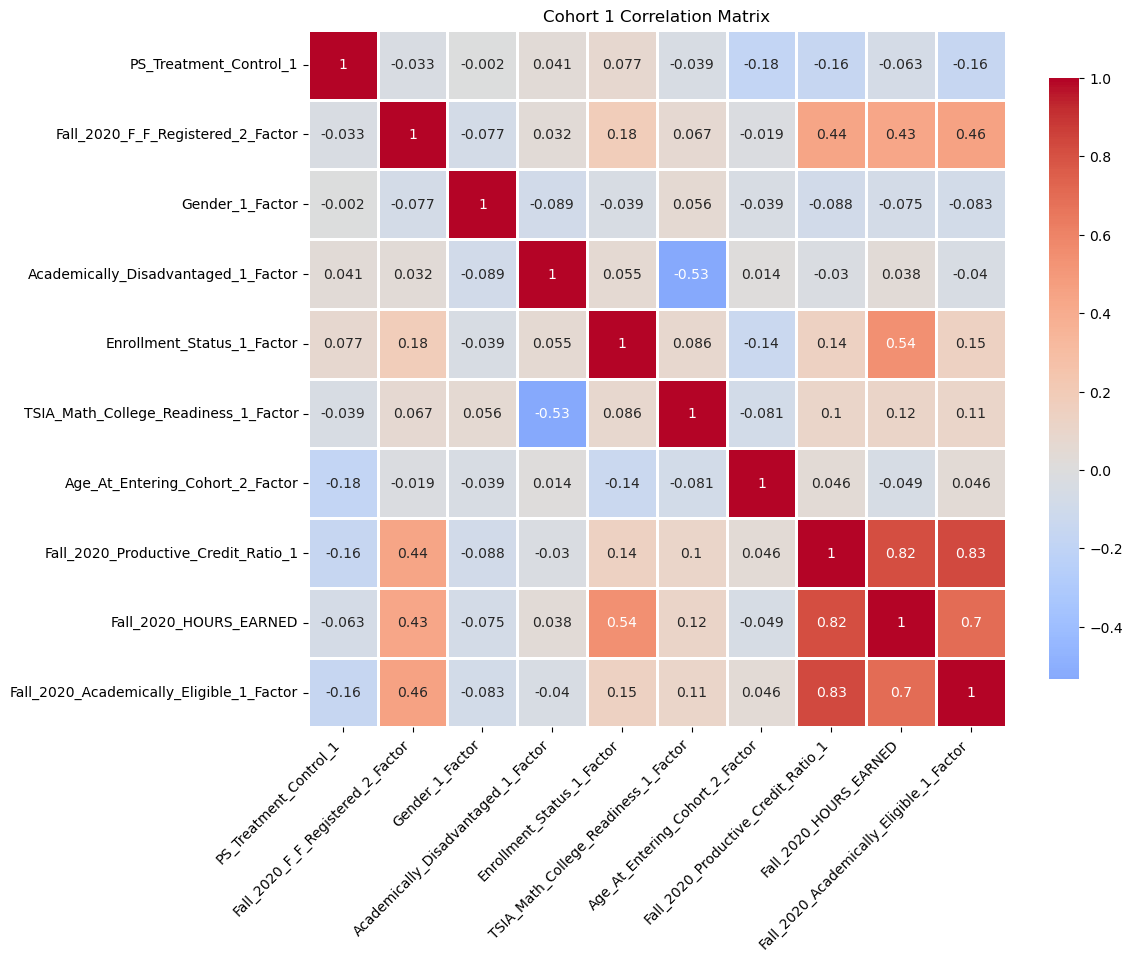

In [18]:
# Cohort 1 Correlation Matrix

c1_corr = df[df['Cohort_Factor'] == 1][['PS_Treatment_Control_1',
                                        'Fall_2020_F_F_Registered_2_Factor',
                                        'Gender_1_Factor',
                                        'Academically_Disadvantaged_1_Factor',
                                        'Enrollment_Status_1_Factor',
                                        'TSIA_Math_College_Readiness_1_Factor',
                                        'Age_At_Entering_Cohort_2_Factor',
                                        'Fall_2020_Productive_Credit_Ratio_1',
                                        'Fall_2020_HOURS_EARNED',
                                        'Fall_2020_Academically_Eligible_1_Factor']].corr().round(3)

plt.figure(figsize=(12, 10))
sns.heatmap(c1_corr, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Cohort 1 Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

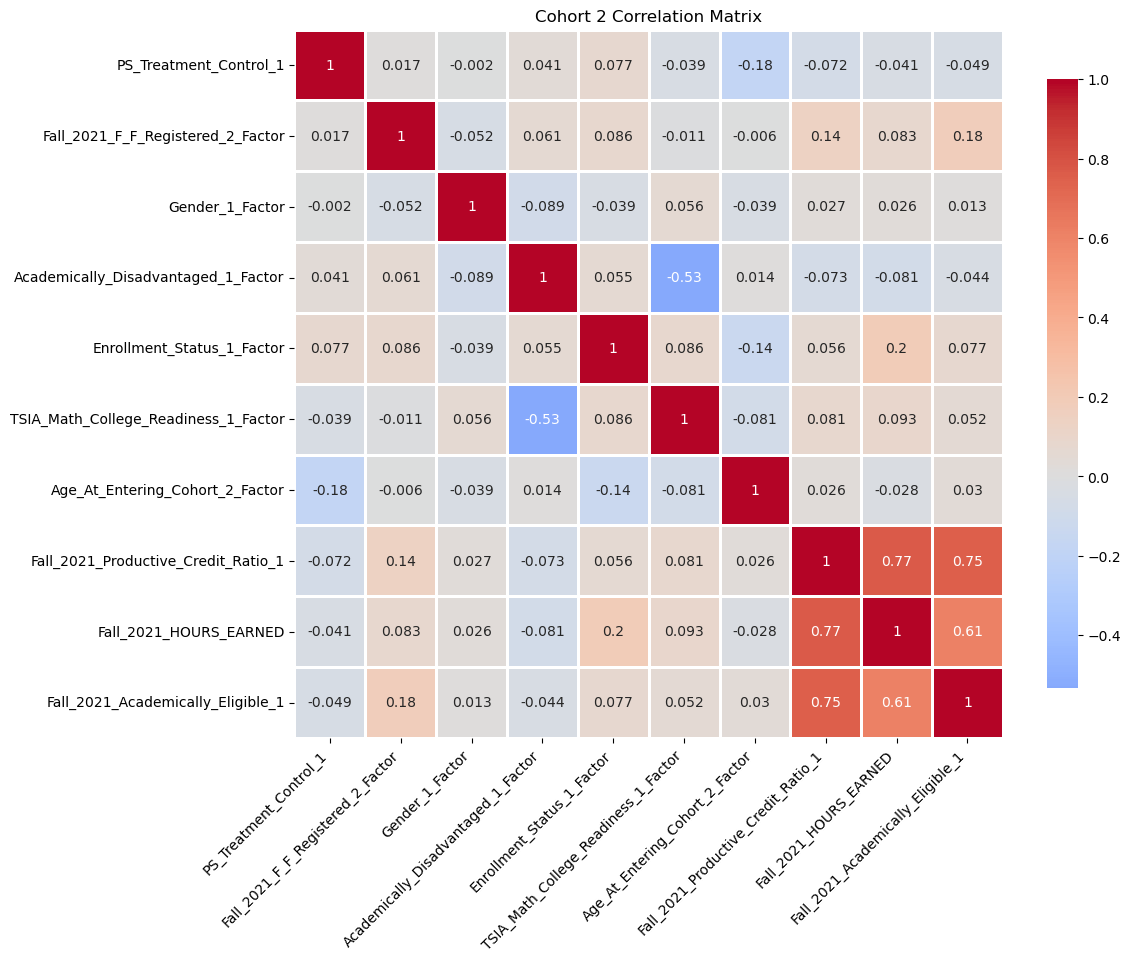

In [19]:
# Cohort 2 Correlation Matrix

c2_corr = df[df['Cohort_Factor'] == 1][['PS_Treatment_Control_1',
                                        'Fall_2021_F_F_Registered_2_Factor',
                                        'Gender_1_Factor',
                                        'Academically_Disadvantaged_1_Factor',
                                        'Enrollment_Status_1_Factor',
                                        'TSIA_Math_College_Readiness_1_Factor',
                                        'Age_At_Entering_Cohort_2_Factor',
                                        'Fall_2021_Productive_Credit_Ratio_1',
                                        'Fall_2021_HOURS_EARNED',
                                        'Fall_2021_Academically_Eligible_1']].corr().round(3)

plt.figure(figsize=(12, 10))
sns.heatmap(c2_corr, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Cohort 2 Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

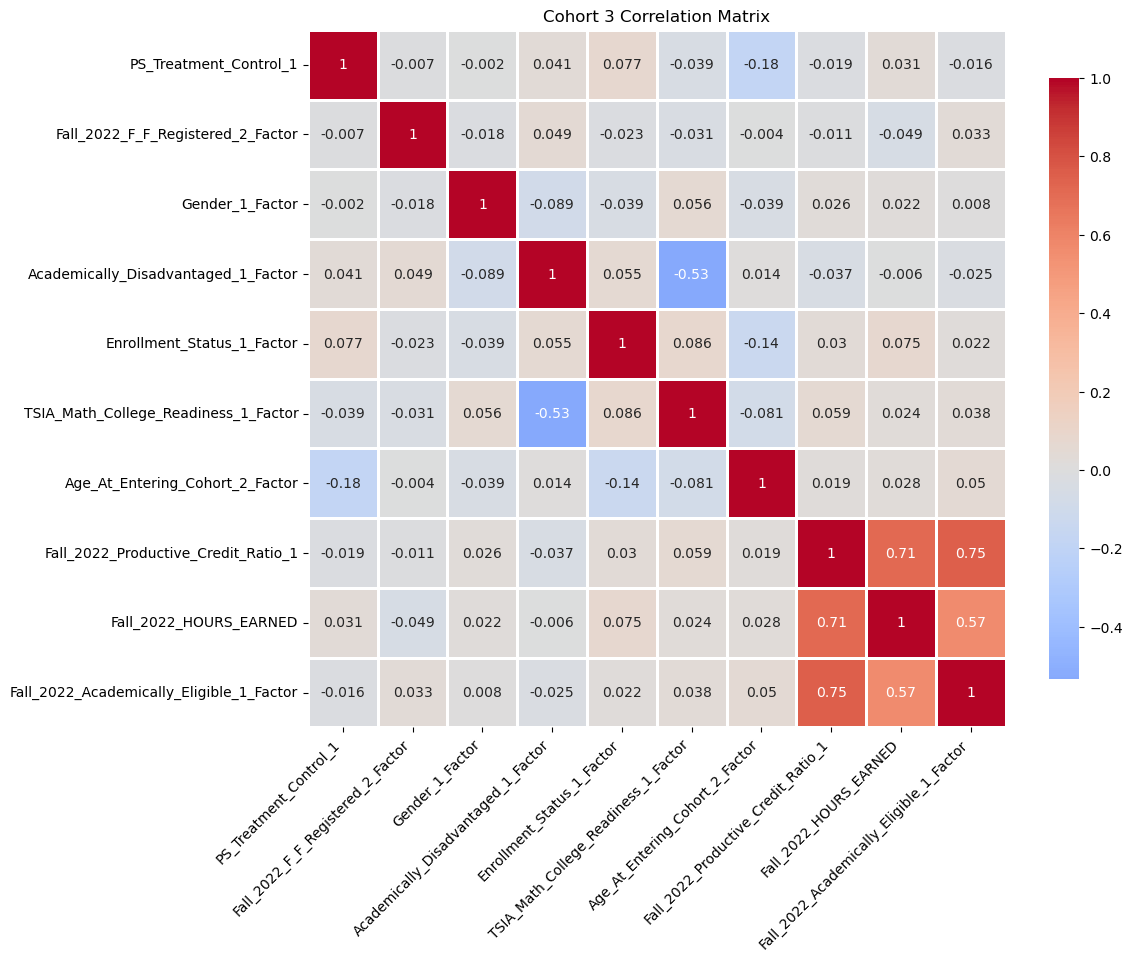

In [20]:
# Cohort 3 Correlation Matrix

c3_corr = df[df['Cohort_Factor'] == 1][['PS_Treatment_Control_1',
                                        'Fall_2022_F_F_Registered_2_Factor',
                                        'Gender_1_Factor',
                                        'Academically_Disadvantaged_1_Factor',
                                        'Enrollment_Status_1_Factor',
                                        'TSIA_Math_College_Readiness_1_Factor',
                                        'Age_At_Entering_Cohort_2_Factor',
                                        'Fall_2022_Productive_Credit_Ratio_1',
                                        'Fall_2022_HOURS_EARNED',
                                        'Fall_2022_Academically_Eligible_1_Factor']].corr().round(3)

plt.figure(figsize=(12, 10))
sns.heatmap(c3_corr, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Cohort 3 Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

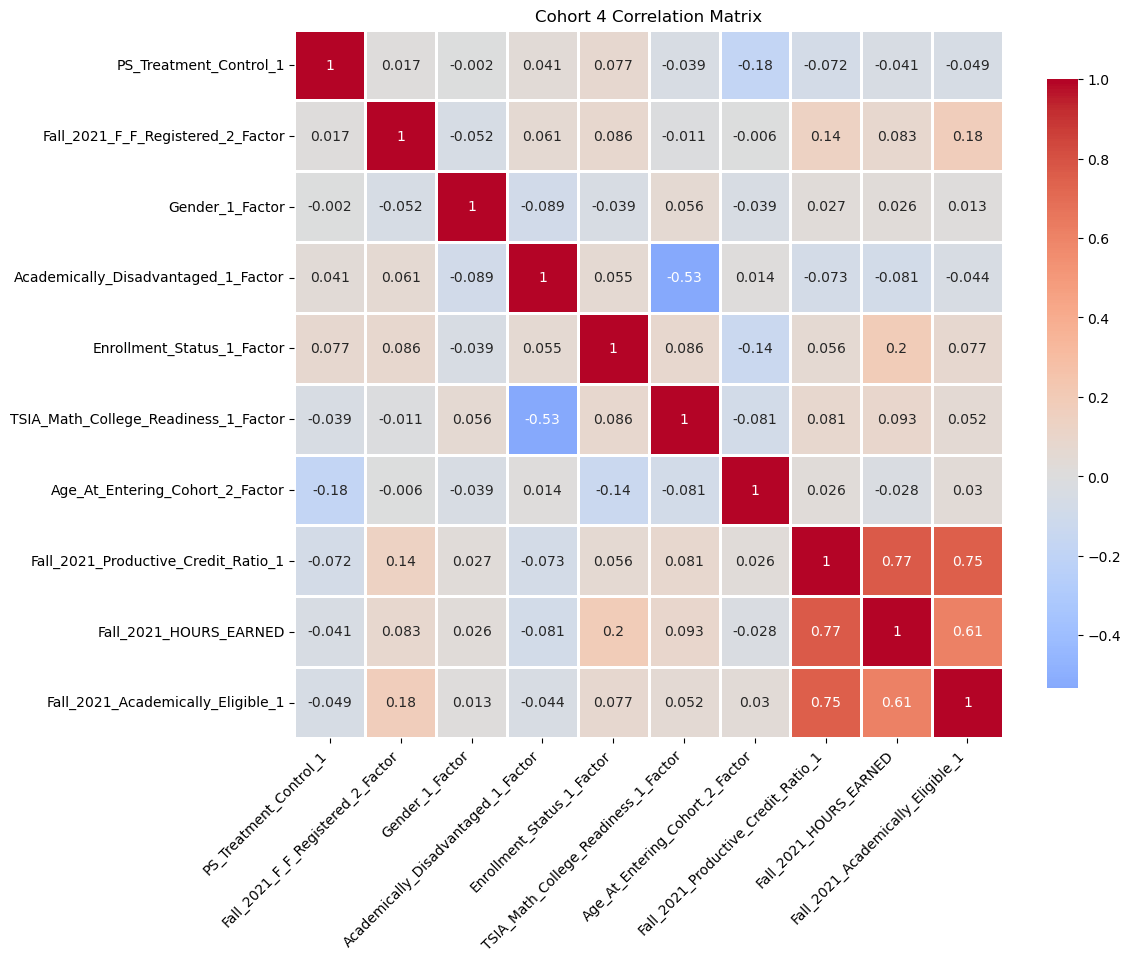

In [21]:
# Cohort 4 Correlation Matrix

c4_corr = df[df['Cohort_Factor'] == 1][['PS_Treatment_Control_1',
                                        'Fall_2023_F_F_Registered_2_Factor',
                                        'Gender_1_Factor',
                                        'Academically_Disadvantaged_1_Factor',
                                        'Enrollment_Status_1_Factor',
                                        'TSIA_Math_College_Readiness_1_Factor',
                                        'Age_At_Entering_Cohort_2_Factor',
                                        'Fall_2023_Productive_Credit_Ratio_1',
                                        'Fall_2023_HOURS_EARNED',
                                        'Fall_2023_Academically_Eligible_1_Factor']].corr().round(3)

plt.figure(figsize=(12, 10))
sns.heatmap(c2_corr, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Cohort 4 Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [36]:
# Cohort 1 Regression

cohort1 = df[df['Cohort_Factor'] == 1]

cohort1_clean = cohort1[['Fall_2020_F_F_Registered_2_Factor',
                         'PS_Treatment_Control_1',
                         'Gender_1_Factor',
                         'Academically_Disadvantaged_1_Factor',
                         'Enrollment_Status_1_Factor',
                         'TSIA_Math_College_Readiness_1_Factor', # Almost all missing values come from TSIA
                         'Age_At_Entering_Cohort_2_Factor',
                         'Fall_2020_Productive_Credit_Ratio_1',
                         'Fall_2020_HOURS_EARNED',
                         'Fall_2020_Academically_Eligible_1_Factor'
                         ]].dropna()

print('Number of Dropped Observations: ', len(cohort1) - len(cohort1_clean))

y = cohort1_clean['Fall_2020_F_F_Registered_2_Factor']
X = cohort1_clean[['PS_Treatment_Control_1',
                   'Gender_1_Factor',
                   'Academically_Disadvantaged_1_Factor',
                   #'Enrollment_Status_1_Factor',
                   'TSIA_Math_College_Readiness_1_Factor',
                   #'Age_At_Entering_Cohort_2_Factor',
                   'Fall_2020_Productive_Credit_Ratio_1',
                   #'Fall_2020_HOURS_EARNED',
                   'Fall_2020_Academically_Eligible_1_Factor'
                   ]]

X = sm.add_constant(X) # Adds a y-intercept (so it's not through the origin)

model1 = sm.Logit(y, X)
results = model1.fit()

print(results.summary())

Number of Dropped Observations:  1220
Optimization terminated successfully.
         Current function value: 0.555996
         Iterations 5
                                   Logit Regression Results                                  
Dep. Variable:     Fall_2020_F_F_Registered_2_Factor   No. Observations:                 7181
Model:                                         Logit   Df Residuals:                     7174
Method:                                          MLE   Df Model:                            6
Date:                               Sat, 29 Nov 2025   Pseudo R-squ.:                  0.1761
Time:                                       00:00:24   Log-Likelihood:                -3992.6
converged:                                      True   LL-Null:                       -4846.2
Covariance Type:                           nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]

In [23]:
# Variance Inflation Factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,feature,VIF
0,const,10.130958
1,PS_Treatment_Control_1,1.023758
2,Gender_1_Factor,1.017176
3,Academically_Disadvantaged_1_Factor,1.405004
4,TSIA_Math_College_Readiness_1_Factor,1.421112
5,Fall_2020_Productive_Credit_Ratio_1,3.152417
6,Fall_2020_Academically_Eligible_1_Factor,3.148265


In [24]:
# Cohort 2 Regression

cohort2 = df[df['Cohort_Factor'] == 2]

cohort2_clean = cohort2[['Fall_2021_F_F_Registered_2_Factor',
                         'PS_Treatment_Control_1',
                         'Gender_1_Factor',
                         'Academically_Disadvantaged_1_Factor',
                         'Enrollment_Status_1_Factor',
                         'TSIA_Math_College_Readiness_1_Factor', # Almost all missing values come from TSIA
                         'Age_At_Entering_Cohort_2_Factor',
                         'Fall_2021_Productive_Credit_Ratio_1',
                         'Fall_2021_HOURS_EARNED',
                         'Fall_2021_Academically_Eligible_1'
                         ]].dropna()

print('Number of Dropped Observations: ', len(cohort2) - len(cohort2_clean))

y = cohort2_clean['Fall_2021_F_F_Registered_2_Factor']
X = cohort2_clean[['PS_Treatment_Control_1',
                   #'Gender_1_Factor',
                   'Academically_Disadvantaged_1_Factor',
                   #'Enrollment_Status_1_Factor',
                   'TSIA_Math_College_Readiness_1_Factor',
                   #'Age_At_Entering_Cohort_2_Factor',
                   'Fall_2021_Productive_Credit_Ratio_1',
                   #'Fall_2021_HOURS_EARNED',
                   'Fall_2021_Academically_Eligible_1'
                   ]]

X = sm.add_constant(X) # Adds a y-intercept (so it's not through the origin)

model2 = sm.Logit(y, X)
results = model2.fit()

print(results.summary())

Number of Dropped Observations:  921
Optimization terminated successfully.
         Current function value: 0.563490
         Iterations 5
                                   Logit Regression Results                                  
Dep. Variable:     Fall_2021_F_F_Registered_2_Factor   No. Observations:                 7445
Model:                                         Logit   Df Residuals:                     7439
Method:                                          MLE   Df Model:                            5
Date:                               Mon, 24 Nov 2025   Pseudo R-squ.:                  0.1607
Time:                                       21:04:25   Log-Likelihood:                -4195.2
converged:                                      True   LL-Null:                       -4998.6
Covariance Type:                           nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
----

In [25]:
# Cohort 3 Regression

cohort3 = df[df['Cohort_Factor'] == 3]

cohort3_clean = cohort3[['Fall_2022_F_F_Registered_2_Factor',
                         'PS_Treatment_Control_1',
                         'Gender_1_Factor',
                         'Academically_Disadvantaged_1_Factor',
                         'Enrollment_Status_1_Factor',
                         'TSIA_Math_College_Readiness_1_Factor', # Almost all missing values come from TSIA
                         'Age_At_Entering_Cohort_2_Factor',
                         'Fall_2022_Productive_Credit_Ratio_1',
                         'Fall_2022_HOURS_EARNED',
                         'Fall_2022_Academically_Eligible_1_Factor'
                         ]].dropna()

print('Number of Dropped Observations: ', len(cohort3) - len(cohort3_clean))

y = cohort3_clean['Fall_2022_F_F_Registered_2_Factor']
X = cohort3_clean[['PS_Treatment_Control_1',
                   'Gender_1_Factor',
                   'Academically_Disadvantaged_1_Factor',
                   #'Enrollment_Status_1_Factor',
                   'TSIA_Math_College_Readiness_1_Factor',
                   #'Age_At_Entering_Cohort_2_Factor',
                   'Fall_2022_Productive_Credit_Ratio_1',
                   #'Fall_2022_HOURS_EARNED',
                   'Fall_2022_Academically_Eligible_1_Factor'
                   ]]

X = sm.add_constant(X) # Adds a y-intercept (so it's not through the origin)

model3 = sm.Logit(y, X)
results = model3.fit()

print(results.summary())

Number of Dropped Observations:  1538
Optimization terminated successfully.
         Current function value: 0.554913
         Iterations 5
                                   Logit Regression Results                                  
Dep. Variable:     Fall_2022_F_F_Registered_2_Factor   No. Observations:                 8608
Model:                                         Logit   Df Residuals:                     8601
Method:                                          MLE   Df Model:                            6
Date:                               Mon, 24 Nov 2025   Pseudo R-squ.:                  0.1783
Time:                                       21:04:26   Log-Likelihood:                -4776.7
converged:                                      True   LL-Null:                       -5812.9
Covariance Type:                           nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]

In [26]:
# Cohort 4 Regression

cohort4 = df[df['Cohort_Factor'] == 4]

cohort4_clean = cohort4[['Fall_2023_F_F_Registered_2_Factor',
                         'PS_Treatment_Control_1',
                         'Gender_1_Factor',
                         'Academically_Disadvantaged_1_Factor',
                         'Enrollment_Status_1_Factor',
                         'TSIA_Math_College_Readiness_1_Factor', # Almost all missing values come from TSIA
                         'Age_At_Entering_Cohort_2_Factor',
                         'Fall_2023_Productive_Credit_Ratio_1',
                         'Fall_2023_HOURS_EARNED',
                         'Fall_2023_Academically_Eligible_1_Factor'
                         ]].dropna()

print('Number of Dropped Observations: ', len(cohort3) - len(cohort3_clean))

y = cohort4_clean['Fall_2023_F_F_Registered_2_Factor']
X = cohort4_clean[['PS_Treatment_Control_1',
                   'Gender_1_Factor',
                   'Academically_Disadvantaged_1_Factor',
                   #'Enrollment_Status_1_Factor',
                   'TSIA_Math_College_Readiness_1_Factor',
                   #'Age_At_Entering_Cohort_2_Factor',
                   'Fall_2023_Productive_Credit_Ratio_1',
                   #'Fall_2023_HOURS_EARNED',
                   'Fall_2023_Academically_Eligible_1_Factor'
                   ]]

X = sm.add_constant(X) # Adds a y-intercept (so it's not through the origin)

model4 = sm.Logit(y, X)
results = model4.fit()

print(results.summary())

Number of Dropped Observations:  1538
         Current function value: inf
         Iterations: 35


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/anaconda3/lib/p

LinAlgError: Singular matrix

## Export

In [27]:
# Export to CSV --> R

df.to_csv('data_cleaning_3_export.csv', index = False)

In [28]:
df

,PS_Treatment_Control_1,Student_ID,Fall_2020_Productive_Credit_Ratio_1,Fall_2021_Productive_Credit_Ratio_1,Fall_2022_Productive_Credit_Ratio_1,Fall_2023_Productive_Credit_Ratio_1,Fall_2020_HOURS_EARNED,Fall_2021_HOURS_EARNED,Fall_2022_HOURS_EARNED,Fall_2023_HOURS_EARNED,...,Fall_2022_F_F_Registered_2_Factor,Fall_2023_F_F_Registered_2_Factor,Gender_1_Factor,Academically_Disadvantaged_1_Factor,Enrollment_Status_1_Factor,TSIA_Math_College_Readiness_1_Factor,Age_At_Entering_Cohort_2_Factor,Fall_2020_Academically_Eligible_1_Factor,Fall_2022_Academically_Eligible_1_Factor,Fall_2023_Academically_Eligible_1_Factor
0,1,857625,100.0,100.0,NaN,NaN,15.0,9.0,NaN,NaN,...,0,0,0,0,1,1.0,0,1.0,NaN,NaN
1,1,1261951,100.0,100.0,NaN,NaN,16.0,4.0,NaN,NaN,...,0,0,0,0,1,1.0,0,1.0,NaN,NaN
2,1,1263342,100.0,100.0,100.0,NaN,16.0,16.0,6.0,NaN,...,0,0,0,0,1,1.0,0,1.0,1.0,NaN
3,1,1269693,100.0,100.0,NaN,100.0,15.0,4.0,NaN,4.0,...,0,1,0,0,1,1.0,0,1.0,NaN,1.0
4,1,1293901,100.0,100.0,100.0,NaN,15.0,15.0,12.0,NaN,...,0,0,0,0,1,1.0,0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49919,0,1637233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,NaN,0,NaN,NaN,NaN
49920,1,1637811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0.0,0,NaN,NaN,NaN
49921,0,1638386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0.0,1,NaN,NaN,NaN
49922,0,1638543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,NaN,0,NaN,NaN,NaN
